In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')

In [ ]:
import pandas as pd

df = pd.DataFrame({'1': (1,20,100), '3': (1,20,900)})
df

,1,3
0,1,1
1,20,20
2,100,900


In [ ]:
df['1'].corr(df['3'])

0.9866925606564106

## Statistik Deskriptif

In [ ]:
# measure central tendency
mct = df.describe().T[['mean', '50%']]
mct.columns = ['mean','median']
mct['mode'] = df.mode().T[0].values[:-1]
mct

,mean,median,mode
sepal_length,5.843333,5.80,5.0
sepal_width,3.057333,3.00,3.0
petal_length,3.758000,4.35,1.4
petal_width,1.199333,1.30,0.2


In [ ]:
# measure of dispersion
mod = df.describe(percentiles=[.25,.50,.75]).T
mod['IQR'] = mod['75%']-mod['25%']
mod['variance'] = mod['std']**2
mod['range'] = mod['max'] - mod['min']
mod =  mod[['variance', 'std', 'range','IQR','25%', '50%','75%']]
mod

,variance,std,range,IQR,25%,50%,75%
sepal_length,0.685694,0.828066,3.6,1.3,5.1,5.80,6.4
sepal_width,0.189979,0.435866,2.4,0.5,2.8,3.00,3.3
petal_length,3.116278,1.765298,5.9,3.5,1.6,4.35,5.1
petal_width,0.581006,0.762238,2.4,1.5,0.3,1.30,1.8


In [ ]:
# correlation matrix
cm = df.corr()
cm

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [ ]:
> cor( c(10,20,100), c(1,20,900))


SyntaxError: ignored

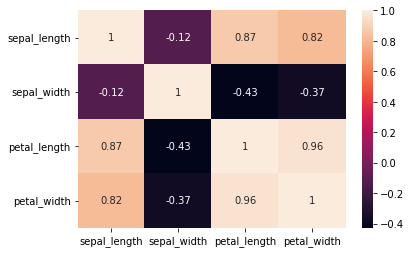

In [ ]:
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
# covariant matrix
df.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [ ]:
# kurtosis

from scipy import stats

kurtosis = []
for i in df.columns[:-1]:
  kurtosis.append(stats.kurtosis(df[i]))

kurt = pd.DataFrame({})
kurt['label'] =df.columns[:-1]
kurt['kurtosis'] = kurtosis
kurt

,label,kurtosis
0,sepal_length,-0.573568
1,sepal_width,0.180976
2,petal_length,-1.395536
3,petal_width,-1.336067


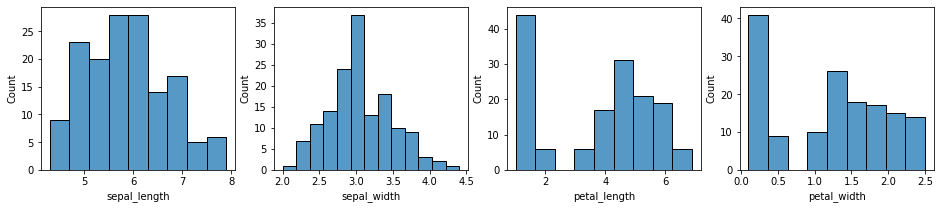

In [ ]:
plt.figure(figsize=(16,3))
counter = 1
for i in df.columns[:-1]:
  plt.subplot(1,4,counter)
  sns.histplot(df[i])
  counter += 1
plt.show()

## Statistik Inferensial

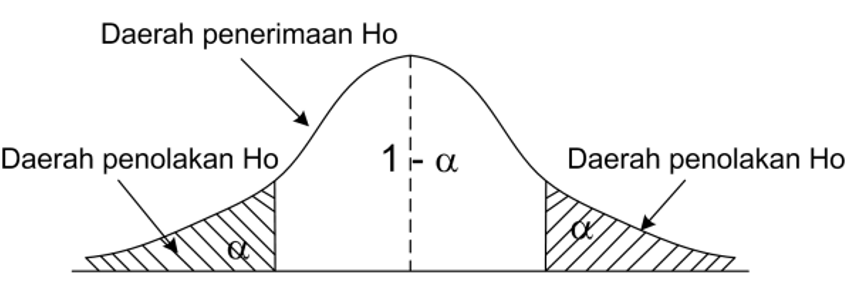

In [ ]:
url = "https://raw.githubusercontent.com/bluedataconsulting/AIMasteryProgram/main/Lab_Exercises/Module2/systolic%20blood%20pressure.csv"
df = pd.read_csv(url)

from statsmodels.stats import weightstats as stests

# step 1 : menentukan hipotesis
# Ho : Rata-rata armsys = 125
# Ha : Rata-rata armsys tidak sama dengan 125

# step 2 : menentukan alpha = 5%

# step 3 : menghitung statistik uji
ztest, pval = stests.ztest(df['armsys'], value=125) #value = mean dari 'armsys' di bawah hypothesis nol
print('P-value = ', pval)

# step 4 : tentukan penolakan Ho.
if pval<0.05:                                # 0.05 adalah nilai signifikasnsi(α)
    print("Mean bukan 125")
else:
    print("Mean adalah 125")

P-value =  0.032546442541153964
Mean bukan 125


In [ ]:
df.describe()

,armsys,fingsys
count,200.000000,200.000000
mean,128.520000,132.815000
std,23.287575,25.648195
min,79.000000,60.000000
25%,111.500000,118.000000
50%,125.000000,130.000000
75%,140.000000,146.500000
max,220.000000,228.000000
